# EC2202 Arrays and Strings

In [1]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/h_jwy5BbPEY" title="YouTube video player" frameborder="0" allowfullscreen></iframe>

**Disclaimer.**
This code examples are based on

1. [KAIST CS206 (Professor Otfried Cheong)](https://otfried.org/courses/cs206/)
2. [LeetCode](https://leetcode.com/)
3. Coding Interviews

In [ ]:
import doctest
import time

## A Basic Array Simulation

Our implementation simply uses a list—but the point is that our array simulation will force us to work only with the operations available for arrays.

In [ ]:
class Array():
  """An array with a fixed-size slots

  >>> test_array = Array(10)
  >>> test_array[0] = 5
  >>> test_array[5] = 'ec2202'
  >>> print(test_array[3])
  None
  >>> print(len(test_array))
  10
  >>> print(test_array)
  Array(5, None, None, None, None, 'ec2202', None, None, None, None)
  >>> for item in test_array:
  ...   print(item)
  5
  None
  None
  None
  None
  ec2202
  None
  None
  None
  None
  """
  def __init__(self, size):
    assert size > 0, "Array size must be > 0"
    self._size = size
    self._elements = [ None ] * size

  def __len__(self):  # len(some_object)
    return self._size

  def __getitem__(self, i):  # array[i], passing the index
    assert i >= 0 and i < len(self), "Array index out of range"
    return self._elements[i]

  def __setitem__(self, i, v):  # array[i] = v라고 set 하는 메서드
    assert i >= 0 and i < len(self), "Array index out of range"
    self._elements[i] = v

  # ppp exercise ::: printing string
  # Print Array(5, None, None, None, None, 'ec2202', None, None, None, None)
  def __str__(self): #__str__ is special method
    s = 'Array('
    sep = ""
    for i in range(len(self)):
      s += sep + str(self._elements[i])
      sep = ", "
    s += ") "
    return s

  # OR

  def __str__(self):
    return "Array(" + ', '.join(map(str, self._elements)) + ')'


  def __repr__(self): # __repr__ is also special method
    pass
  # ppp exercise ::: Iteration
  # 시험에 안 나옴
  def __iter__(self):  # iterator: c++, java
    return _ArrayIterator(self._elements)

class _ArrayIterator:
  def __init__(self, theArray):
    self._arrayRef = theArray
    self._curNdx = 0

  def __iter__(self):
    return self

  def __next__(self):
    if self._curNdx < len(self._arrayRef):
      entry = self._arrayRef[self._curNdx]
      self._curNdx += 1
      return entry
    else:
      raise StopIteration

In [ ]:
# c.f. about join function (str 클래스에 내장된 메서드)

test_list = [1, 2, 3, 4, 5]
print(list(map(str, test_list)))
print("; ".join(['1', '2', '3', '4', '5']))   #.join 앞에 써주는게 리스트의 각 요소 사이에 끼어들어감

['1', '2', '3', '4', '5']
1; 2; 3; 4; 5


In [ ]:
# define a fixed-size array
test_array = Array(10)

# set items at a specific position
test_array[0] = 5
test_array[5] = 'ec2202'

# access to the item at a specific position
print(test_array[3])

# support the length function
print(len(test_array))

# nicely formatted string repr.
print(test_array)

# support iteration
for item in test_array:
  print(item)

None
10
Array(5, None, None, None, None, ec2202, None, None, None, None) 
5
None
None
None
None
ec2202
None
None
None
None


In [ ]:
doctest.run_docstring_examples(Array, globals(), False, __name__)

### Difference between `__repr__` and `__str__`

In [ ]:
import datetime
a = datetime.datetime(2017, 9, 27) # create object
print(str(a)) # Format for Human Readable String
print(repr(a)) # just create same object when called. Python Representation of the object

2017-09-27 00:00:00
datetime.datetime(2017, 9, 27, 0, 0)


In [ ]:
b = datetime.datetime(2017, 9, 27, 0, 0)
print(b)

2017-09-27 00:00:00


## Arrays that can Grow

The main feature that distinguishes the Python list from an array is that it can grow and shrink when elements are added or removed. We will now try to implement such a data structure ourselves. The only new operation we support is `append`, which adds an element at the end of the collection.

In [2]:
class GrowArray():  # based on Array
  def __init__(self):
    # no need to specify the size as (self, size) since this is implementation of Arrays that can Grow
    # define an internal array
    # it starts from len(self) = 0 => then, grows
    self._a = None

  def __len__(self):
    return len(self._a)

  def __getitem__(self, i):
    assert i >= 0 and i < len(self), "Array index out of boundary"
    return self._a[i]

  def append(self, el):
    # Case 1: the first time we append
    #         it is an empty array
    if self._a == None:
      self._a = Array(1) #create an Array
      self._a[0] = el # assign element to the 0th index
    # Case 2: when we append elements later
    else:
      # ex Situation:: -----------------------------------------------
      # k = [1, 2, 3, 4]
      # k.append(5)
      # => old_k = [1, 2, 3, 4]
      # => k = [1, 2, 3, 4, None]
      # => k[n] = 5
      #---------------------------------------------------------------
      # we first create a new array of the correct size
      oldA = self._a # copy the old array
      n = len(oldA)
      self._a = Array(n + 1) # add new slot to add new item in the array
      # then we copy all elements from the old array to the new array
      for i in range(n):
        self._a[i] = oldA[i]
      # finally we store the element el in the last slot
      self._a[n] = el

In [ ]:
class GrowArray():
  def __init__(self):
    self._a = None

  def __len__(self):
    return len(self._a)

  def __getitem__(self, i):
    assert i >= 0 and i < len(self), "Array index out of range" # assert 조건에 따라
    return self._a[i]

  def append(self, el):
    # Case 1: the first time we append
    #         it is an empty array
    if self._a == None:
      self._a = Array(1) #create an Array
      self._a[0] = el # assign element to the 0th index
    # Case 2: when we append elements later
    else:
      # ex Situation:: -----------------------------------------------
      # k = [1, 2, 3, 4]
      # k.append(5)
      # => old_k = [1, 2, 3, 4]
      # => k = [1, 2, 3, 4, None]
      # => k[n] = 5
      #---------------------------------------------------------------
      # we first create a new array of the correct size
      oldA = self._a # copy the old array
      n = len(oldA)
      self._a = Array(n + 1) # add new slot to add new item in the array
      # then we copy all elements from the old array to the new array
      for i in range(n):
        self._a[i] = oldA[i]
      # finally we store the element el in the last slot
      self._a[n] = el

Let's see what we can do with our `GrowArray`

* One of the cool things about Colab is file input/output. You can find the details [here](https://colab.research.google.com/notebooks/io.ipynb).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
f = open('/content/drive/My Drive/수업자료/[EC2202] Data Structures/01_lecture_slides/words-5000.txt', 'r')
# open file by f = open('여기에 path 넣어주는것', 'r'하면 읽는것 'w'도 할 수 있음)

print("Starting...")

t_start = time.time()

words = GrowArray()
for line in f.readlines():
  s = line.strip()
  words.append(s)

t_end = time.time()

print("Reading all %d words took %g seconds\n" % (len(words), t_end - t_start))

f.close()

print("The first five words are:")
for i in range(5):
  print(words[i])

Starting...
Reading all 5000 words took 10.7715 seconds

The first five words are:
aa
aah
aahed
aahing
aahs


Then, what about the **defalut list offered by Python?**

In [ ]:
f = open('/content/drive/My Drive/수업자료/[EC2202] Data Structures/01_lecture_slides/words-5000.txt', 'r')

print("Starting...")
t_start = time.time()
words = []  # GrowArray()
for line in f.readlines():
  s = line.strip()
  words = words + [s]  # words.append(s)

t_end = time.time()
print("Reading all %d words took %g seconds\n" % (len(words), t_end - t_start))

f.close()

print("The first five words are:")
for i in range(5):
  print(words[i])

Starting...
Reading all 5000 words took 0.049283 seconds

The first five words are:
aa
aah
aahed
aahing
aahs


**Why is our `GrowArray` so slow??**

Let us analyze this implementation. To keep the analysis simple, we will only count how often elements are copied from an old array to a new one. That is, we count how often the line `self._a[i] = oldA[i]` is executed. Clearly, when calling `a.append(el)`, this happends exactly `len(a)` times.

That means that when we store n words in a `GrowArray` using this method, the copy line is executed exactly

\begin{align}
        &\sum_{k=0}^{n-1} k = \frac{n(n-1)}{2} ≈ \frac{n^2}{2}
    \end{align}
  
The total running time is quadratic in the number of words.

## An Improved Version

Clearly the problem is that creating a new array every time we append an element is very wasteful—we need to do this less often. The solution is to use an array that is larger than the current size of the `GrowArray`, so that we can add elements without having to recreate the array.


In [ ]:
class GrowArray():
  def __init__(self):
    # initialize the array with some margins
    self._a = Array(32)
    # keep track of the number of items
    self._size = 0

  def __len__(self):
    return self._size

  def __getitem__(self, i):
    return self._a[i]

  def append(self, el):
    # no need to think about 2 cases
    # array is full, make a new one
    if self._size == len(self._a): # if size reaches the size of internal array,
     # increase the size of an array
      oldA = self._a # copy
      n = len(oldA)
      # self._a = Array(n + 32) , add 32 to increse the size
      self._a = Array(2 * n) # more faster way compared to n+32
      for i in range(n):
        self._a[i] = oldA[i]
    self._a[self._size] = el
    self._size += 1

Let's test our implementation!

In [ ]:
f = open('/content/drive/My Drive/수업자료/[EC2202] Data Structures/01_lecture_slides/words-5000.txt', 'r')

print("Starting...")
t_start = time.time()
words = GrowArray()
for line in f.readlines():
  s = line.strip()
  words.append(s)

t_end = time.time()
print("Reading all %d words took %g seconds\n" % (len(words), t_end - t_start))

f.close()

print("The first five words are:")
for i in range(5):
  print(words[i])

Starting...
Reading all 5000 words took 0.0142441 seconds

The first five words are:
aa
aah
aahed
aahing
aahs


## Strings

Strings are just arrays :)

## ppp Exercises

### Q1. Replace elements

[Amazon] Given an array `arr`, replace every element in that array with the greatest element among the elements to its right, and replace the last element with -1. Do not create a new list, but perform in-place operation.

Expected Time Complexity: O(N)

In [ ]:
def replace_elems(arr):
    '''
    replace every element in the array
    with the greatest element among the elements to its right,
    and replace the last element with -1.

    >>> test_list = [17, 18, 5, 4, 6, 1]
    >>> replace_elems(test_list)
    >>> print(test_list)
    [18, 6, 6, 6, 1, -1]
    >>> test_list = [400]
    >>> replace_elems(test_list)
    >>> print(test_list)
    [-1]
    >>> test_list = [2, 3, 1, 9]
    >>> replace_elems(test_list)
    >>> print(test_list)
    [9, 9, 9, -1]
    '''

    for i in range(len(arr)-1): # time complexity O(N)
      arr[i] = max(arr[i+1:]) # time complexity O(N)
    arr[-1] = -1
    # total complexity is not O(N) (this is wrong solution)

    n = len(arr)
    max_i = -1
    for i in range(n-1, -1, -1): # ITERATING from the BACKTIME can be better
    # n-1 부터 -1까지 -1씩 step
      temp = arr[i]
      arr[i] = max_i
      max_i = max(max_i, temp)

In [ ]:
doctest.run_docstring_examples(replace_elems, globals(), False, __name__)

### Q2. Spiral matrix

[Amazon] Given an m x n matrix, return all elements of the matrix in spiral order.
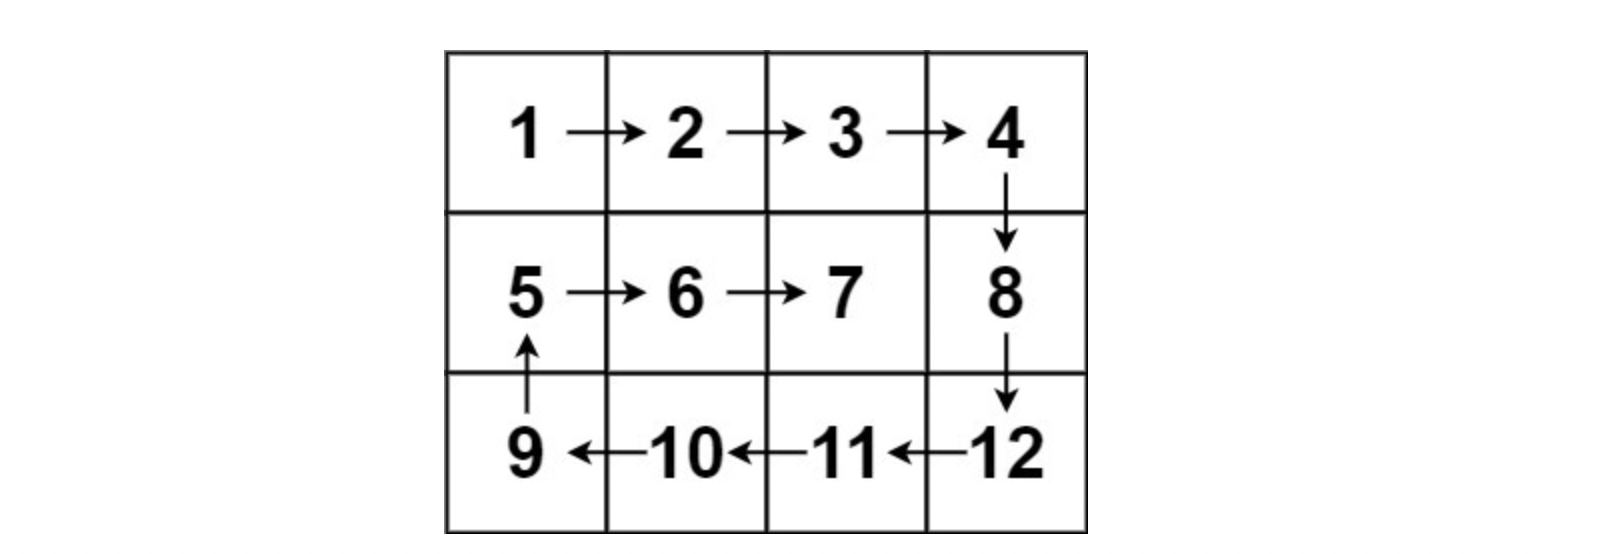

In [ ]:
def spiral_array(array):
  '''
  return all elements of 2D matrix in the spiral order

  >>> matrix = [[1,  2,  3,  4],
  ...           [5,  6,  7,  8],
  ...           [9, 10, 11, 12]]
  >>> spiral_array(matrix)
  [1, 2, 3, 4, 8, 12, 11, 10, 9, 5, 6, 7]
  >>> matrix = [[ 1,  2,  3,  4,  5,  6],
  ...           [ 7,  8,  9, 10, 11, 12],
  ...           [13, 14, 15, 16, 17, 18]]
  >>> spiral_array(matrix)
  [1, 2, 3, 4, 5, 6, 12, 18, 17, 16, 15, 14, 13, 7, 8, 9, 10, 11]
  '''

In [ ]:
doctest.run_docstring_examples(spiral_array, globals(), False, __name__)